<a href="https://colab.research.google.com/github/ad709kr/Health-insurance-cross-sell-prediction/blob/main/Heath_Insurance_cross_sell_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Health Insurance Cross sell Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Member name**    - Adarsh Kumar


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here : https://github.com/ad709kr/Health-insurance-cross-sell-prediction

# **Problem Statement**
Building a model to predict whether a customer would be interested in Vehicle Insurance or not. It will be extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.


# **Business Context**
<br> Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.
Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

## Data Description
<br>In order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.
<br>**Attribute Information**:
<br>**id:**	Unique ID for the customer
<br>**Gender:**	Gender of the customer
<br>**Age:**	Age of the customer
<br>**Driving_License:** 0 : Customer does not have DL, 1 : Customer already has DL
<br>**Region_Code:**	Unique code for the region of the customer
<br>**Previously_Insured:**	1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance
<br>**Vehicle_Age:**	Age of the Vehicle
<br>**Vehicle_Damage:**	1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.
<br>**Annual_Premium:**	The amount customer needs to pay as premium in the year
<br>**Policy_Sales_Channel:**	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
<br>**Vintage:**	Number of Days, Customer has been associated with the company
<br>**Response:**	1 : Customer is interested, 0 : Customer is not interested


## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [3]:
# Load Dataset
path = '/content/drive/MyDrive/Almabetter/classification_project/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv'
data = pd.read_csv(path)

### Dataset First View

In [4]:
# Dataset First Look
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
print("Dataset consist ", data.shape[0]," rows and ",data.shape[1],"columns.")

Dataset consist  381109  rows and  12 columns.


### Dataset Information

In [6]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
data[data.duplicated()].count()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

### What did you know about your dataset?

There is no duplicate and missing value present in the given dataset.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [10]:
# Dataset Describe
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


**Observation:**
<br> (1) The customers age ranges from 20 to 85, however the 75% of the customer is in range of 20 to 49 years.
<br> (2) The minimum annual premium value is 2630 and goes up to 540165, however the 75% of people pays the premium in range of 2630 to 39400. For top 25% of customer the variation range is vary high.
<br> (3)vintage value varies in range of 10 to 299.

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
cat_feat = ['Gender', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 
       'Policy_Sales_Channel', 'Response']
for feat in cat_feat:
  print(feat)
  print(data[feat].value_counts())
  print("-"*50)

Gender
Male      206089
Female    175020
Name: Gender, dtype: int64
--------------------------------------------------
Driving_License
1    380297
0       812
Name: Driving_License, dtype: int64
--------------------------------------------------
Region_Code
28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
30.0     12191
29.0     11065
50.0     10243
3.0       9251
11.0      9232
36.0      8797
33.0      7654
47.0      7436
35.0      6942
6.0       6280
45.0      5605
37.0      5501
18.0      5153
48.0      4681
14.0      4678
39.0      4644
10.0      4374
21.0      4266
2.0       4038
13.0      4036
7.0       3279
12.0      3198
9.0       3101
27.0      2823
32.0      2787
43.0      2639
17.0      2617
26.0      2587
25.0      2503
24.0      2415
38.0      2026
0.0       2021
16.0      2007
31.0      1960
23.0      1960
20.0      1935
49.0      1832
4.0       1801
34.0      1664
19.0      1535
22.0      1309
40.0      1295
5.0       1279
1.0       1008
44.0   

**Inference:** 
<br> Age, Annual_premium feature is of numerical types and rest all are of the categorical types.


## ***3.Exploratory Data Analysis***

**Univariate analysis:**
<br> In this section, we plot each feature individually with  respect to the target variable which is the Response and see how these features impact the target variable.

In [12]:
data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

#### Chart - 1 : Response
<br> Target variable, it is either 1 or 0. 1 means customer is interested and 0 means customer is not interested.

0    334399
1     46710
Name: Response, dtype: int64


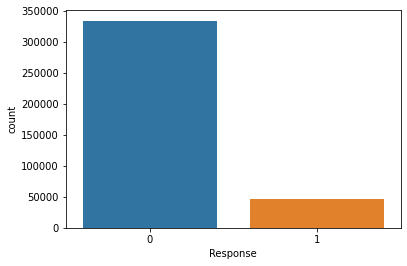

In [13]:
# Chart - 1 visualization code
sns.countplot(data['Response'])
print(data['Response'].value_counts())

In [14]:
print("Total ",round(data['Response'].value_counts()[1]*100/data.shape[0],2),"% of customer are interested in vehicle insurance")

Total  12.26 % of customer are interested in vehicle insurance


##### 1. Why did you pick the specific chart?

**Answer:** Since our target variable belongs to two categories i.e., classification task. To count the number of data belongs to which category the count plot is most suitable.

##### 2. What is/are the insight(s) found from the chart?

**Observation:**
<br> (1) Total 334399 customers are not interested and 46710 customers are interested in the vehicle insurance.
<br> (2) This is clearly a case of class imbalance where most of the customer are not interested in the product. 


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:**
 Knowing the percentage of customer who are interested will help the business which in this case is 12.26%.

#### Chart - 2 : Gender

<Figure size 432x288 with 0 Axes>

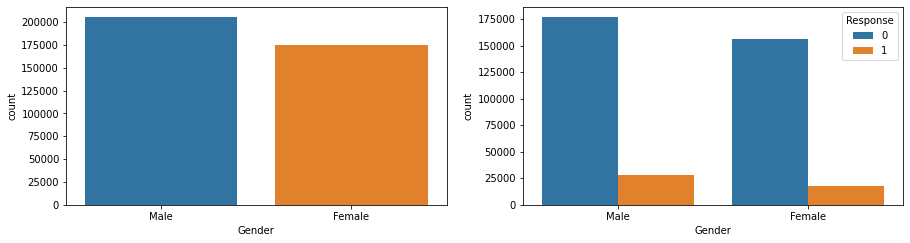

In [15]:
# Chart - 2 visualization code
plt.figure(1)
plt.figure(figsize= (15,8))
plt.subplot(221)
sns.countplot(data['Gender'])

plt.subplot(222)
sns.countplot(x=data['Gender'],hue = data['Response'])

In [16]:
data['Gender'].value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

In [17]:
yes = data[data['Response'] == 1]
male_yes = yes[yes['Gender'] == 'Male'].shape[0]
female_yes = yes[yes['Gender'] == 'Female'].shape[0]
print("out of ",data['Gender'].value_counts()['Male']," male candidates , only",male_yes,"responded positively which is approximately ", round(male_yes*100/data['Gender'].value_counts()['Male'],2),"%")
print("out of ",data['Gender'].value_counts()['Female']," female candidates , only",female_yes,"responded positively which is approximately ", round(female_yes*100/data['Gender'].value_counts()['Female'],2),"%")

out of  206089  male candidates , only 28525 responded positively which is approximately  13.84 %
out of  175020  female candidates , only 18185 responded positively which is approximately  10.39 %


##### 1. Why did you pick the specific chart?

**Answer:** needed count of the categorical variable so used countplot

##### 2. What is/are the insight(s) found from the chart?

**observation** 
<br> (1)The number of male customer is more as compared with the female customer.
<br> (2)The male customers are more interested to take the vehicle insurance than the female customers.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer :**
<br> yes, male customers are more willing to buy the vehicle insurance as compared to females.

#### Chart - 3 : Age

<Figure size 432x288 with 0 Axes>

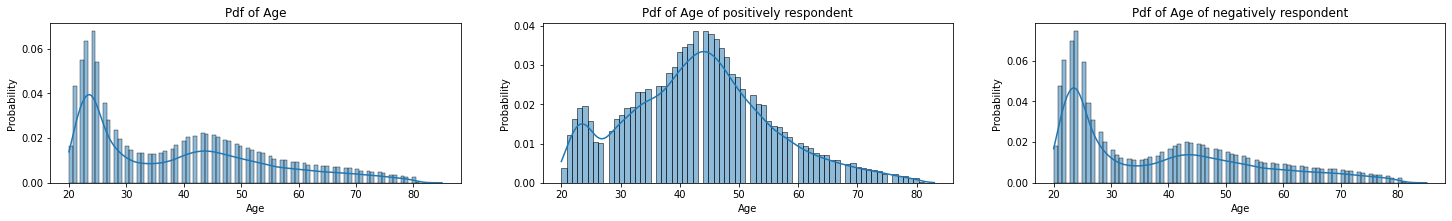

In [66]:
# Chart - 3 visualization code
def histplot(data,col,title):
  sns.histplot(x = data[col],kde =True, stat='probability',palette='tab10')
  plt.title(title)
data_yes = data[data['Response']==1]
data_no = data[data['Response']==0]

plt.figure(1)
plt.figure(figsize=(25,10))
plt.subplot(331)
histplot(data,'Age','Pdf of Age')

plt.subplot(332)
histplot(data_yes,'Age','Pdf of Age of positively respondent')

plt.subplot(333)
histplot(data_no,'Age','Pdf of Age of negatively respondent')

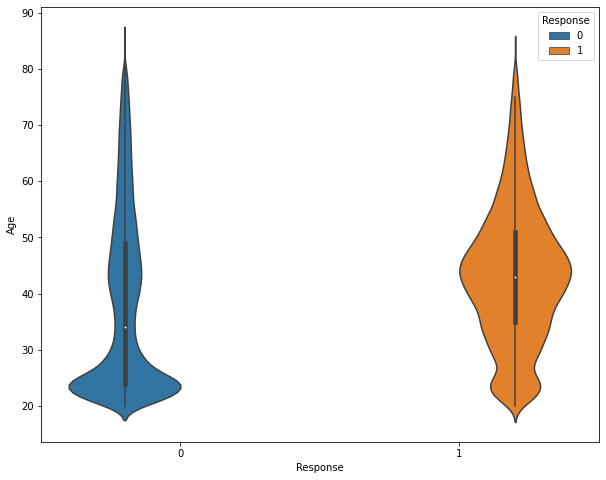

In [71]:
plt.figure(figsize=(10,8))
sns.violinplot(data = data, x = 'Response',y = 'Age', hue = 'Response')

##### 1. Why did you pick the specific chart?

**Answer :** Age is the numeric feature so pdf will be better visualization. So we plotted the Age for all data and with different response value individually.
<br> violinplot is combination of pdf + boxplot, so it will give the shape of pdf of the age and stats of box plot.

##### 2. What is/are the insight(s) found from the chart?

**Answer:** 
<br> (1) Two peaks are observed for total responses of Age feature. One approximately at 25 and other at 45 (somewhere in 40-50)
<br> (2) for customer who responded positively the peak observed in between 40-50
<br> (2) for customer who responded negatively the pdf follows similar trend as total respondent.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer :** The age group between 40-50 are showing more interest in vehicle insurance than the other age groups which might for segment the customer.

#### Chart - 4 : Driving License 


<Figure size 432x288 with 0 Axes>

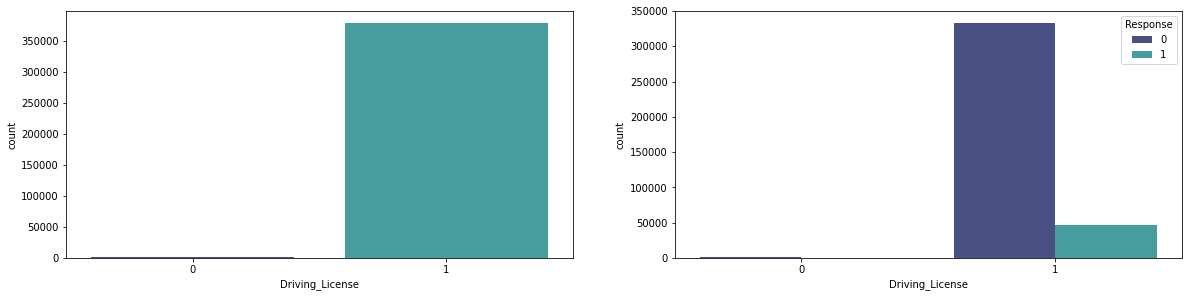

In [85]:
# Chart - 4 visualization code
plt.figure(1)
plt.figure(figsize= (20,10))
plt.subplot(221)
sns.countplot(data['Driving_License'], palette = "mako")

plt.subplot(222)
sns.countplot(x='Driving_License',hue='Response',data=data,palette="mako")

In [81]:
data['Driving_License'].value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

In [82]:
## Lets see the Customers who do not have the driving license and still interest in vehicle insurance
data_noDL = data[data['Driving_License'] == 0]
print("out of the 812 customer who does not have license ,", data_noDL[data_noDL['Response'] == 1].shape[0],"were still interested in vehicle Insurance")

out of the 812 customer who does not have license , 41 were still interested in vehicle Insurance


In [83]:
## Lets see the Customers who do not have the driving license and still interest in vehicle insurance
data_yesDL = data[data['Driving_License'] == 1]
print("out of the 380297 customer who does  have license ,", data_yesDL[data_yesDL['Response'] == 1].shape[0],"were interested in vehicle Insurance")

out of the 380297 customer who does  have license , 46669 were interested in vehicle Insurance


In [89]:
# calculate the percentage
print("The yes responded from the customers having license is",round(data_yesDL[data_yesDL['Response'] == 1].shape[0]*100/data['Driving_License'].value_counts()[1],2),"% and who does not have license are",round(data_noDL[data_noDL['Response'] == 1].shape[0]*100/data['Driving_License'].value_counts()[0],0),"%")

The yes responded from the customers having license is 12.27 % and who does not have license are 5.0 %


##### 1. Why did you pick the specific chart?

**Answer :** In this case variable is both the variable is categorical (Response, Driving_license) Hence we use countplot. 

##### 2. What is/are the insight(s) found from the chart?

**Answer:** 
<br> (1) 812 Customers does not have the driving license.
<br> (2) 41 customer out of the customer who do not have driving license were still interested in the vehicle insurance. 
<br> (3) out of the 380297 customer who does  have license , 46669 were interested in vehicle Insurance
<br> (4) there is high probability that person having license will show interest rather than customer who does not.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:** Yes, targeting customer having deiving license have more chances to get positive response.

#### Chart - 5 : Region code

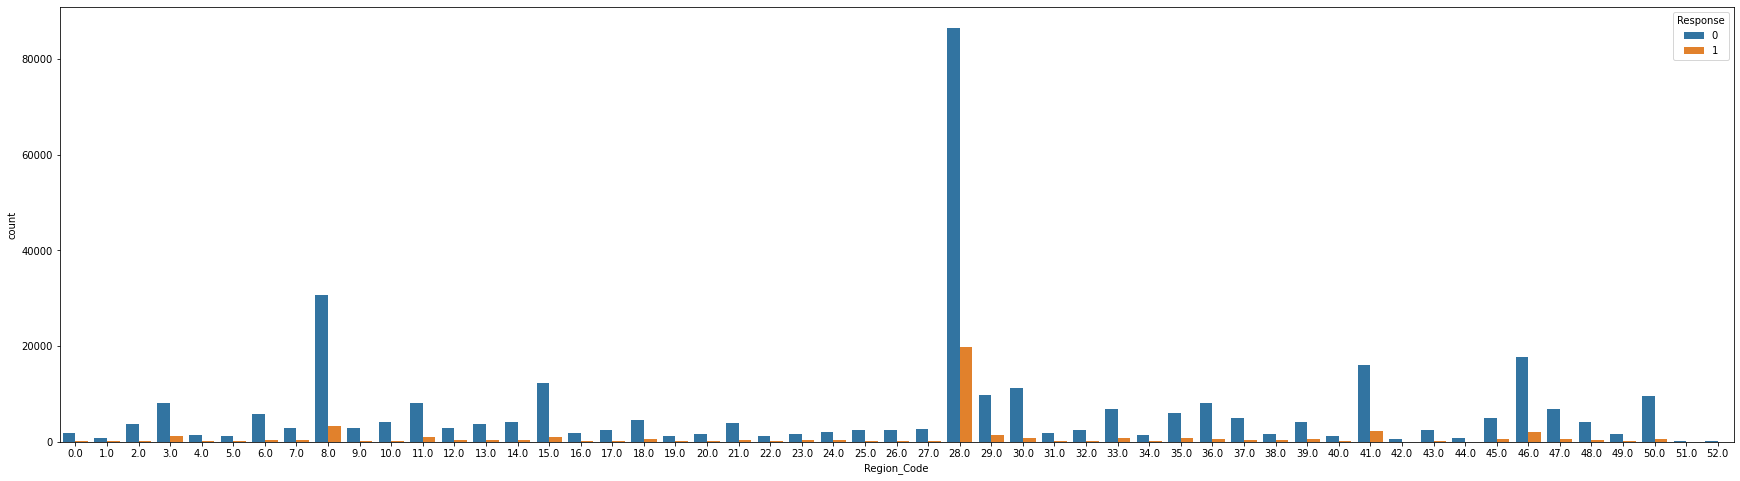

In [92]:
plt.figure(figsize = (30,8))
sns.countplot(data['Region_Code'], hue = data['Response'])

In [95]:
region_code_list = list(data['Region_Code'].unique())
len(region_code_list)

53

In [97]:
data['Region_Code'].value_counts().iloc[:5]

28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
Name: Region_Code, dtype: int64

In [100]:
response_yes = data[data['Response'] == 1]
response_yes['Region_Code'].value_counts().iloc[:5]

28.0    19917
8.0      3257
41.0     2224
46.0     2032
29.0     1365
Name: Region_Code, dtype: int64

##### 1. Why did you pick the specific chart?

**Answer:** Because feature is categorical having many category.
 

##### 2. What is/are the insight(s) found from the chart?

**Answer:**
<br> (1) out of total 53 region, region having Region_Code 28 has the maximum number of customer which is equal to 106415. And 19917 of these customers responded positively.
<br> (2) the top 5 region having maximum number of customer are not same as the top 5 region having positive response.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:**
<br>  Yes, It will help to target the customer based on the region and also help to understand the sentiment of customer about the product based on the region.

#### Chart - 6 : Previously_Insured

<Figure size 432x288 with 0 Axes>

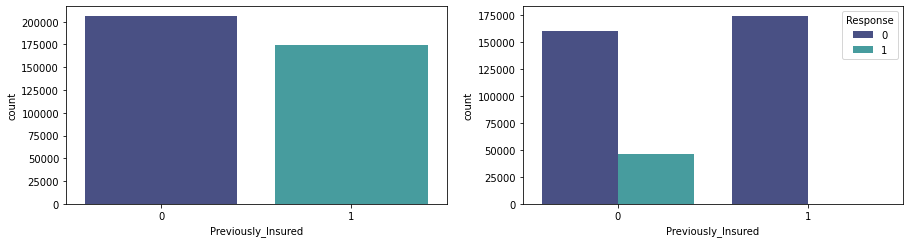

In [104]:
# Chart - 4 visualization code
# Chart - 4 visualization code
plt.figure(1)
plt.figure(figsize= (15,8))
plt.subplot(221)
sns.countplot(data['Previously_Insured'], palette = "mako")

plt.subplot(222)
sns.countplot(x='Previously_Insured',hue='Response',data=data,palette="mako")


In [105]:
data['Previously_Insured'].value_counts()

0    206481
1    174628
Name: Previously_Insured, dtype: int64

In [115]:
insur_yes = data[data['Previously_Insured']==1]
print("out of 174628 customer who have previously insured", insur_yes[insur_yes['Response']== 1].shape[0]," were responded positively approximately", round(insur_yes[insur_yes['Response']== 1].shape[0]*100/data['Previously_Insured'].value_counts()[1],2),"%")

out of 174628 customer who have previously insured 158  were responded positively approximately 0.09 %


In [116]:
insur_no = data[data['Previously_Insured']==0]
print("out of 206481 customer who have previously insured", insur_no[insur_no['Response']== 1].shape[0]," were responded positively approximately", round(insur_no[insur_no['Response']== 1].shape[0]*100/data['Previously_Insured'].value_counts()[1],2),"%")

out of 206481 customer who have previously insured 46552  were responded positively approximately 26.66 %


##### 1. Why did you pick the specific chart?

**Answer** we have to count the values from each categories.


##### 2. What is/are the insight(s) found from the chart?

**Answer:** 
<br> (1) Customers who have not taken vehicle insurance previously are more interested in taking the vehicle_insurance.
<br>(2) Customers who have already taken vehicle insurance, very few of them are interested only 0.09%.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:** Yes, because it gives the information that most the customer are interested are not previously insured.


#### Chart - 7 :  Vehicle_Age

In [159]:
df= data.groupby('Vehicle_Age')['Response'].count()
df


Vehicle_Age
1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Response, dtype: int64

In [160]:
response_yes = data[data['Response']==1]
df_yes = response_yes.groupby('Vehicle_Age')['Response'].count()

In [161]:
df_yes

Vehicle_Age
1-2 Year     34806
< 1 Year      7202
> 2 Years     4702
Name: Response, dtype: int64

Text(0.5, 1.0, 'pie chart Yes responded')

<Figure size 432x288 with 0 Axes>

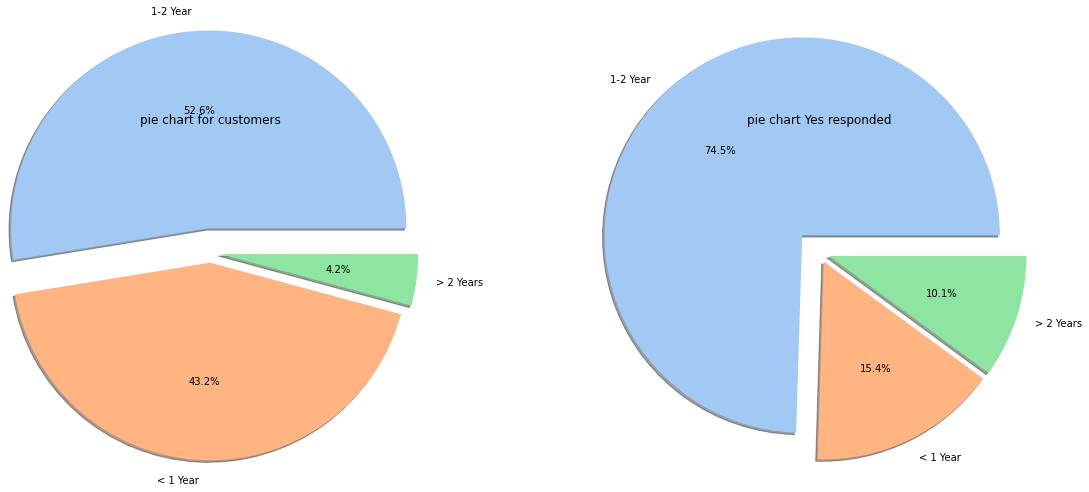

In [162]:
# Chart - 7 visualization code
plt.figure(1)
plt.figure(figsize= (20,10))

plt.subplot(221)
explode = [0.25,0.1,0.1]
colors = sns.color_palette('pastel')
plt.pie(df,labels = df.index,explode = explode,radius = 2,autopct='%1.1f%%',shadow = True ,colors = colors)
plt.title("pie chart for customers")
plt.subplot(222)
explode = [0.25,0.1,0.1]
colors = sns.color_palette('pastel')
plt.pie(df_yes,labels = df_yes.index,explode = explode,radius = 2,autopct='%1.1f%%',shadow = True ,colors = colors)
plt.title("pie chart Yes responded")

In [124]:
data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

##### 1. Why did you pick the specific chart?

**Answer:** 

##### 2. What is/are the insight(s) found from the chart?

**Answer:** 


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Answe:**

#### Chart - 8

##### 1. Why did you pick the specific chart?

**Answer:**

##### 2. What is/are the insight(s) found from the chart?

**Answer:** 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:**
<br> 

#### Chart - 9

In [24]:
# Chart - 9 visualization code



##### 1. Why did you pick the specific chart?

**Answer** 

##### 2. What is/are the insight(s) found from the chart?

**Answer:** 


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:** 

#### Chart - 10

In [25]:
# Chart - 10 visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [26]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [27]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [28]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [29]:
# Correlation Heatmap visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [30]:
# Pair Plot visualization code
#Lets simply plot pair plot of just numerical data of distinct type like temperature and dew point temperature are similar so we keep one of them


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [31]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [32]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [33]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [34]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [35]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [36]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [37]:
# Expand Contraction

#### 2. Lower Casing

In [38]:
# Lower Casing

#### 3. Removing Punctuations

In [39]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [40]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [41]:
# Remove Stopwords

In [42]:
# Remove White spaces

#### 6. Rephrase Text

In [43]:
# Rephrase Text

#### 7. Tokenization

In [44]:
# Tokenization

#### 8. Text Normalization

In [45]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [46]:
# POS Taging

#### 10. Text Vectorization

In [47]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [48]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [49]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [50]:
# Transform Your data

### 6. Data Scaling

In [51]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [52]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [53]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [54]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [55]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [56]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [57]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [58]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [59]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [60]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [61]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [62]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [63]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [64]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***